In [43]:
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Activation, Dense, Dropout
from tensorflow.keras import optimizers

from keras.preprocessing.image import ImageDataGenerator

In [14]:
df = pd.read_csv(r'C:\Users\lpapar01\Downloads\cracksdataset\cracks.csv',';', usecols=['image', 'poly_wafer', 'crack', 'inactive'])
df.head()

,image,poly_wafer,crack,inactive
0,images/cell2044.png,1,1,0
1,images/cell0123.png,1,0,0
2,images/cell2241.png,1,0,0
3,images/cell2426.png,0,0,0
4,images/cell1552.png,0,0,0


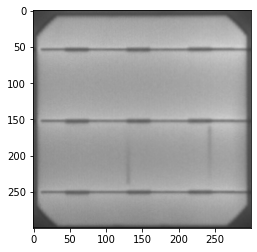

In [15]:
img = cv2.imread(r'C:\Users\lpapar01\Downloads\cracksdataset\images\cell1552.png')
plt.imshow(img)

In [16]:
img.shape

(300, 300, 3)

#### Every image has a height of 300 pixels and a width of 300 pixels. A value of 3 means that it’s a RGB image. 

In [27]:
"""datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

"""
datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [44]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df[:1800],
    directory = 'C:/Users/lpapar01/Downloads/cracksdataset/images',
    subset = 'training',
    x_col = 'image',
    y_col = 'crack',
    batch_size=32,
    seed=42,
    shuffle=True,
    target_size = (300,300),
    class_mode = 'binary'
)


valid_generator = test_datagen.flow_from_dataframe(
    dataframe=df[1800:1900],
    directory = './crackdataset/images',
    subset = 'training',
    x_col = 'image',
    y_col = 'crack',
    batch_size=32,
    seed=42,
    shuffle=True,
    target_size = (300,300),
    class_mode = 'binary'
)


test_generator = test_datagen.flow_from_dataframe(
    dataframe=df[1900:],
    directory = './crackdataset/images',
    subset = 'training',
    x_col = 'image',
    y_col = 'crack',
    batch_size=1,
    seed=42,
    shuffle=True,
    target_size = (300,300),
    class_mode = 'binary'
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\lpapar01\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1800 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
C:\Users\lpapar01\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 100 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
C:\Users\lpapar01\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 100 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [46]:
model = Sequential()
model.add(Conv2D(32, (3,3) ,activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [50]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(), 
    metrics = ['accuracy']
)

In [51]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2000,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 64
)

<ipython-input-51-789f0df88641>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [52]:
ids = []
X_test = []
for image in os.listdir(test_directory):
    ids.append(image.split('.')[0])
    path = os.path.join(test_directory, image)
    X_test.append(cv2.imread(path))
    
X_test = np.array(X_test)
X_test = X_test.astype('float32') / 255

predictions = model.predict(X_test)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'test'